In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

df = pd.read_excel('C:/Anaconda3/projects/oled/oled.xlsx', sheetname='pholed_model')
df = df[list(df.columns)[1:-1] + ['cd/A']]
df.dropna(axis=0, inplace=True)

X = df[list(df.columns)[:-1]]
y = df[['cd/A']]

X.head()

,homo_HIL,thickness_HIL,lumo_HTL1,homo_HTL1,thickness_HTL1,lumo_HTL2,homo_HTL2,thickness_HTL2,lumo_HTL3,homo_HTL3,...,triplet_ETL,total_ETL_thickness,lumo_ETL1,homo_ETL1,thickness_ETL1,lumo_ETL2,homo_ETL2,thickness_ETL2,cathode_workfunction,thickness_EIL
0,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,2.6,35,2.8,6.2,0,2.8,6.2,35.0,2.8,10.0
1,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,2.6,35,2.8,6.2,0,2.8,6.2,35.0,2.8,10.0
2,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,2.6,35,2.8,6.2,0,2.8,6.2,35.0,2.8,10.0
3,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,2.6,35,2.8,6.2,0,2.8,6.2,35.0,2.8,10.0
4,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,2.6,35,2.8,6.2,0,2.8,6.2,35.0,2.8,10.0


In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=12)

# filename = 'adaboost_model.sav'
filename = 'pholed_rf_model.sav'

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
print('R-squared: ', loaded_model.score(X_test, y_test))

R-squared:  0.87869391923


In [40]:
# new_df = pd.read_excel('C:/Anaconda3/projects/oled/generated_devices.xlsx', sheetname='Sheet1')
new_df = pd.read_pickle('C:/Anaconda3/projects/oled/firpic_only_devices.pkl')

new_X = new_df[:]
# print(new_df.shape)

y_pred = loaded_model.predict(new_X)
y_pred = [round(float(i), 2) for i in y_pred]

new_X['cd/a'] = y_pred
# device = new_X.loc[(new_X['cd/a'] >= 15) & (new_X['cd/a'] < 25)]
device = new_X.loc[new_X['cd/a'] < 15]
device.shape

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(6120, 32)

In [41]:
device.columns = ['homo_HIL','thick_HIL','lumo_HTL1','homo_HTL1','thickness_HTL1','lumo_HTL2','homo_HTL2','thickness_HTL2',
                  'lumo_HTL3','homo_HTL3','thickness_HTL3','total_HTL_thickness','triplet_HTL','LUMO_EML','HOMO_EML',
                  'triplet_HOST','thickness_EML','lumo_dopant','homo_dopant','triplet_dopant','dopant_percentage','triplet_ETL',
                  'total ETL','lumo_ETL1','homo_ETL1','thickness_ETL1','lumo_ETL2','homo_ETL2','thickness_ETL2','wf_1',
                  'thickness_EIL','cd/a']
device.head()

,homo_HIL,thick_HIL,lumo_HTL1,homo_HTL1,thickness_HTL1,lumo_HTL2,homo_HTL2,thickness_HTL2,lumo_HTL3,homo_HTL3,...,total ETL,lumo_ETL1,homo_ETL1,thickness_ETL1,lumo_ETL2,homo_ETL2,thickness_ETL2,wf_1,thickness_EIL,cd/a
12,9.5,10,2.4,6.1,40,2.4,6.1,0,2.4,6.1,...,35,2.8,6.2,0,2.8,6.2,35,2.20,1,8.10
13,9.5,10,2.4,6.1,40,2.4,6.1,0,2.4,6.1,...,35,2.8,6.2,0,2.8,6.2,35,3.50,1,7.99
14,9.5,10,2.4,6.1,40,2.4,6.1,0,2.4,6.1,...,35,2.8,6.2,0,2.8,6.2,35,4.28,0,10.24
18,9.5,10,2.4,6.1,40,2.4,6.1,0,2.4,6.1,...,35,3.0,6.4,0,3.0,6.4,35,2.20,1,8.36
19,9.5,10,2.4,6.1,40,2.4,6.1,0,2.4,6.1,...,35,3.0,6.4,0,3.0,6.4,35,3.50,1,8.28


In [42]:
device.to_pickle('C:/Anaconda3/projects/oled/firpic only/firpic_15.pkl')

In [43]:
df1 = pd.read_pickle('C:/Anaconda3/projects/oled/firpic only/firpic_15.pkl')
df2 = pd.read_pickle('C:/Anaconda3/projects/oled/firpic only/firpic_25.pkl')
df3 = pd.read_pickle('C:/Anaconda3/projects/oled/firpic only/firpic_30.pkl')
df4 = pd.read_pickle('C:/Anaconda3/projects/oled/firpic only/firpic_35.pkl')
df5 = pd.read_pickle('C:/Anaconda3/projects/oled/firpic only/firpic_40.pkl')
df6 = pd.read_pickle('C:/Anaconda3/projects/oled/firpic only/firpic_45.pkl')
df7 = pd.read_pickle('C:/Anaconda3/projects/oled/firpic only/firpic_50.pkl')

,50,45,40,35,30,25,15
count,275.000000,2922.000000,8454.000000,2195.000000,14952.000000,3838.000000,6120.000000
mean,2.331855,2.329788,2.236553,2.314925,2.279770,2.123564,2.257500
std,0.125602,0.126920,0.210331,0.164542,0.175233,0.253250,0.199124
min,1.900000,1.900000,1.900000,1.900000,1.900000,1.900000,1.900000
25%,2.260000,2.260000,2.000000,2.260000,2.200000,1.900000,2.150000
50%,2.400000,2.400000,2.260000,2.400000,2.400000,2.000000,2.330000
75%,2.400000,2.400000,2.400000,2.400000,2.400000,2.500000,2.400000
max,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000


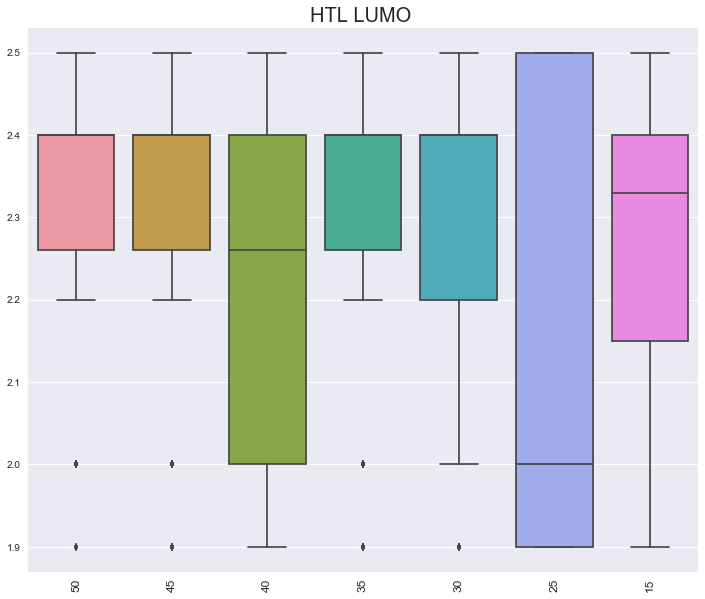

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

HTL = {'50': df7['lumo_HTL1'] , '45': df6['lumo_HTL1'] , '40': df5['lumo_HTL1'] , '35': df4['lumo_HTL1'] , 
       '30': df3['lumo_HTL1'] , '25': df2['lumo_HTL1'] , '15': df1['lumo_HTL1']}
sequence = ['50', '45', '40', '35', '30', '25', '15']
df = pd.DataFrame(data=HTL).reindex(columns=sequence)

# boxplot
f, ax = plt.subplots(figsize=(12, 10))
fig = sns.boxplot(data=df)
plt.xticks(rotation=90,fontsize=12)
plt.title('HTL LUMO ',fontsize=20);
df.describe()

,50,45,40,35,30,25,15
count,275.000000,2922.000000,8454.000000,2195.000000,14952.000000,3838.000000,6120.000000
mean,5.816364,5.844661,5.559771,5.787654,5.676752,5.292913,5.625000
std,0.246407,0.246594,0.305381,0.316887,0.284900,0.228425,0.319205
min,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000
25%,5.700000,5.700000,5.200000,5.700000,5.500000,5.100000,5.425000
50%,5.800000,5.900000,5.700000,5.800000,5.700000,5.200000,5.700000
75%,6.100000,6.100000,5.800000,6.100000,5.900000,5.500000,5.825000
max,6.100000,6.100000,6.100000,6.100000,6.100000,5.900000,6.100000


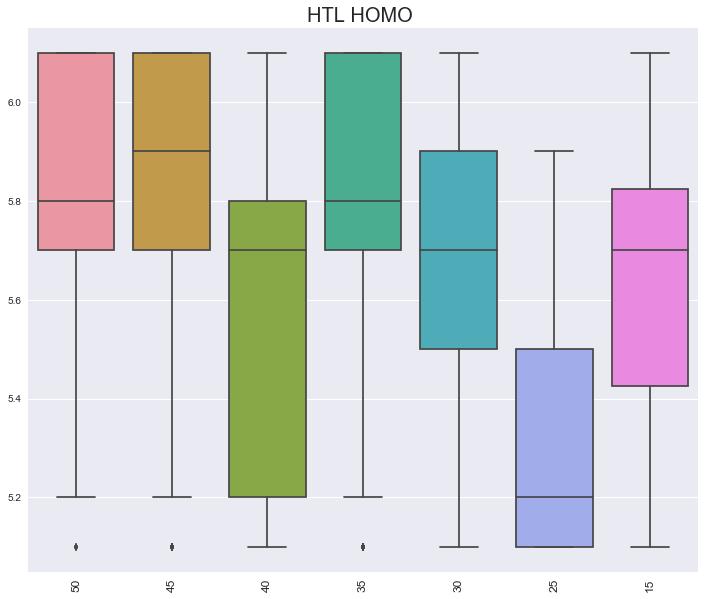

In [45]:
HTL = {'50': df7['homo_HTL1'] , '45': df6['homo_HTL1'] , '40': df5['homo_HTL1'] , '35': df4['homo_HTL1'] , 
       '30': df3['homo_HTL1'] , '25': df2['homo_HTL1'] , '15': df1['homo_HTL1']}
sequence = ['50', '45', '40', '35', '30', '25', '15']
df = pd.DataFrame(data=HTL).reindex(columns=sequence)

# boxplot
f, ax = plt.subplots(figsize=(12, 10))
fig = sns.boxplot(data=df)
plt.xticks(rotation=90,fontsize=12)
plt.title('HTL HOMO ',fontsize=20);
df.describe()

,50,45,40,35,30,25,15
count,275.000000,2922.000000,8454.000000,2195.000000,14952.000000,3838.000000,6120.000000
mean,2.843927,2.826359,2.745833,2.799877,2.785079,2.635206,2.762500
std,0.158848,0.159656,0.232540,0.181504,0.215585,0.221876,0.220288
min,2.300000,2.300000,2.300000,2.300000,2.300000,2.300000,2.300000
25%,2.800000,2.800000,2.580000,2.800000,2.580000,2.300000,2.647500
50%,2.940000,2.800000,2.870000,2.800000,2.870000,2.670000,2.835000
75%,2.940000,2.940000,2.940000,2.940000,2.940000,2.870000,2.940000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


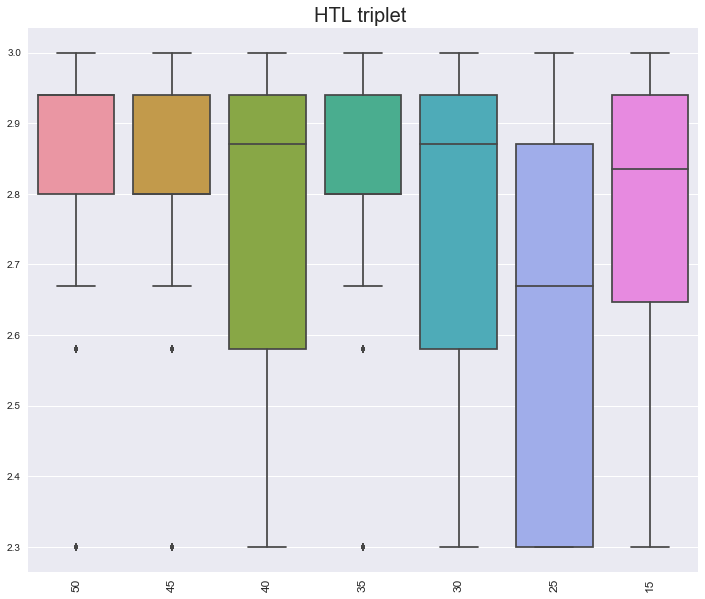

In [46]:
HTL = {'50': df7['triplet_HTL'] , '45': df6['triplet_HTL'] , '40': df5['triplet_HTL'] , '35': df4['triplet_HTL'] , 
       '30': df3['triplet_HTL'] , '25': df2['triplet_HTL'] , '15': df1['triplet_HTL']}
sequence = ['50', '45', '40', '35', '30', '25', '15']
df = pd.DataFrame(data=HTL).reindex(columns=sequence)

# boxplot
f, ax = plt.subplots(figsize=(12, 10))
fig = sns.boxplot(data=df)
plt.xticks(rotation=90,fontsize=12)
plt.title('HTL triplet ',fontsize=20);
df.describe()

,50,45,40,35,30,25,15
count,275.0,2922.000000,8454.000000,2195.000000,14952.000000,3838.000000,6120.000000
mean,7.5,6.597084,6.543615,6.787681,6.460443,6.369148,6.533333
std,0.0,0.478823,0.446091,0.506488,0.344390,0.329679,0.339962
min,7.5,5.850000,5.850000,5.850000,5.850000,5.850000,6.200000
25%,7.5,6.130000,6.120000,6.500000,6.120000,6.020000,6.200000
50%,7.5,6.560000,6.560000,6.800000,6.500000,6.300000,6.400000
75%,7.5,6.800000,6.800000,7.500000,6.790000,6.670000,7.000000
max,7.5,7.500000,7.500000,7.500000,7.000000,7.000000,7.000000


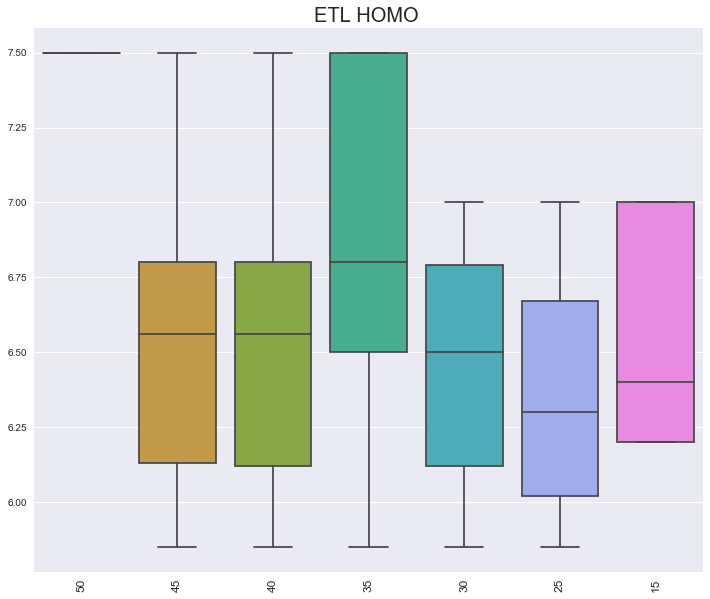

In [47]:
ETL = {'50': df7['homo_ETL1'] , '45': df6['homo_ETL1'] , '40': df5['homo_ETL1'] , '35': df4['homo_ETL1'] , 
       '30': df3['homo_ETL1'] , '25': df2['homo_ETL1'] , '15': df1['homo_ETL1']}
sequence = ['50', '45', '40', '35', '30', '25', '15']
df = pd.DataFrame(data=ETL).reindex(columns=sequence)

# boxplot
f, ax = plt.subplots(figsize=(12, 10))
fig = sns.boxplot(data=df)
plt.xticks(rotation=90,fontsize=12)
plt.title('ETL HOMO ',fontsize=20);
df.describe()

,50,45,40,35,30,25,15
count,2.750000e+02,2922.000000,8454.000000,2195.000000,14952.000000,3838.000000,6120.000000
mean,3.470000e+00,2.730240,2.851356,2.832310,2.737022,2.838426,3.100000
std,1.957555e-14,0.350828,0.319825,0.410316,0.266197,0.245927,0.294416
min,3.470000e+00,2.260000,2.260000,2.260000,2.260000,2.260000,2.800000
25%,3.470000e+00,2.500000,2.700000,2.500000,2.520000,2.700000,2.800000
50%,3.470000e+00,2.700000,2.750000,2.700000,2.730000,2.880000,3.000000
75%,3.470000e+00,2.750000,2.910000,3.470000,2.880000,2.910000,3.500000
max,3.470000e+00,3.470000,3.470000,3.470000,3.320000,3.320000,3.500000


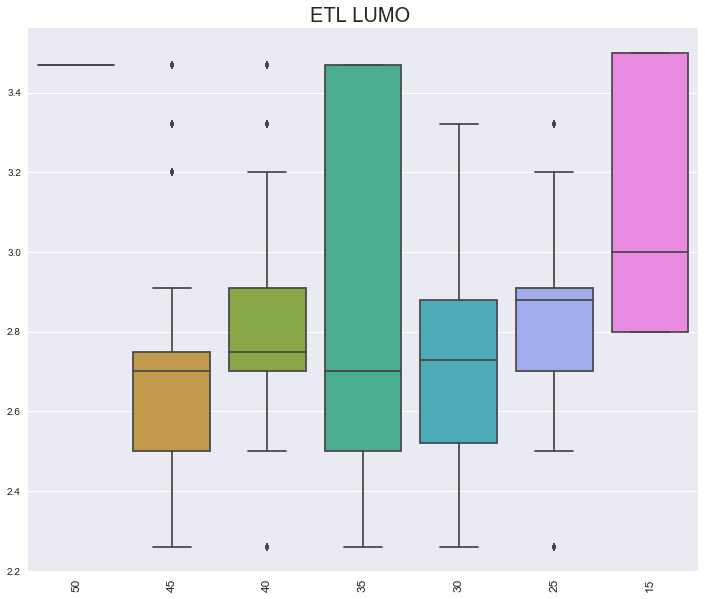

In [48]:
ETL = {'50': df7['lumo_ETL1'] , '45': df6['lumo_ETL1'] , '40': df5['lumo_ETL1'] , '35': df4['lumo_ETL1'] , 
       '30': df3['lumo_ETL1'] , '25': df2['lumo_ETL1'] , '15': df1['lumo_ETL1']}
sequence = ['50', '45', '40', '35', '30', '25', '15']
df = pd.DataFrame(data=ETL).reindex(columns=sequence)

# boxplot
f, ax = plt.subplots(figsize=(12, 10))
fig = sns.boxplot(data=df)
plt.xticks(rotation=90,fontsize=12)
plt.title('ETL LUMO ',fontsize=20);
df.describe()

,50,45,40,35,30,25,15
count,2.750000e+02,2922.000000,8454.000000,2195.000000,14952.000000,3838.000000,6120.000000
mean,2.990000e+00,2.882902,2.841211,2.934638,2.842249,2.778718,2.566667
std,7.118382e-15,0.248001,0.202667,0.254976,0.228869,0.129948,0.047144
min,2.990000e+00,2.690000,2.690000,2.690000,2.690000,2.690000,2.500000
25%,2.990000e+00,2.700000,2.700000,2.700000,2.700000,2.700000,2.500000
50%,2.990000e+00,2.760000,2.750000,2.800000,2.750000,2.750000,2.600000
75%,2.990000e+00,2.990000,2.950000,2.990000,2.800000,2.800000,2.600000
max,2.990000e+00,3.400000,3.400000,3.400000,3.400000,3.400000,2.600000


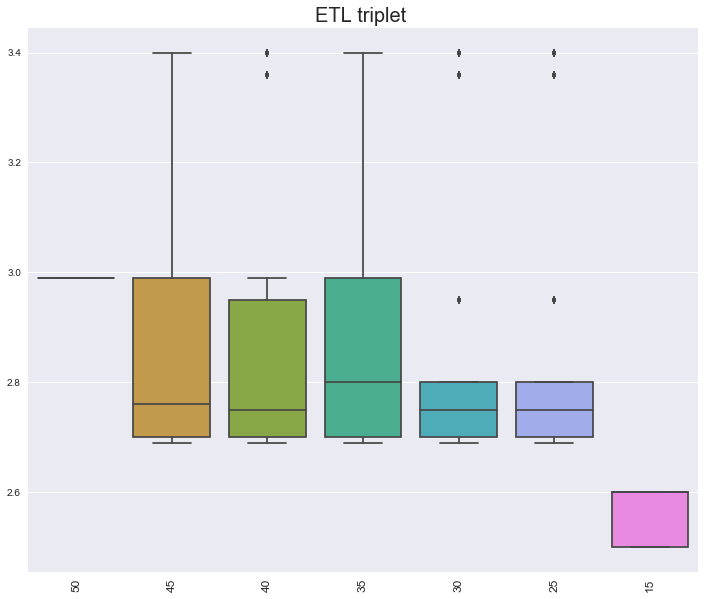

In [49]:
ETL = {'50': df7['triplet_ETL'] , '45': df6['triplet_ETL'] , '40': df5['triplet_ETL'] , '35': df4['triplet_ETL'] , 
       '30': df3['triplet_ETL'] , '25': df2['triplet_ETL'] , '15': df1['triplet_ETL']}
sequence = ['50', '45', '40', '35', '30', '25', '15']
df = pd.DataFrame(data=ETL).reindex(columns=sequence)

# boxplot
f, ax = plt.subplots(figsize=(12, 10))
fig = sns.boxplot(data=df)
plt.xticks(rotation=90,fontsize=12)
plt.title('ETL triplet ',fontsize=20);
df.describe()

,50,45,40,35,30,25,15
count,275.000000,2922.000000,8454.000000,2195.000000,14952.000000,3838.000000,6120.000000
mean,2.391018,2.426940,2.416710,2.434182,2.417420,2.416097,2.418824
std,0.208620,0.241094,0.255575,0.221366,0.261981,0.218633,0.250758
min,2.020000,2.020000,2.020000,2.020000,2.020000,2.020000,2.020000
25%,2.300000,2.300000,2.270000,2.300000,2.270000,2.280000,2.280000
50%,2.400000,2.400000,2.400000,2.460000,2.300000,2.400000,2.400000
75%,2.460000,2.460000,2.460000,2.460000,2.460000,2.550000,2.460000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


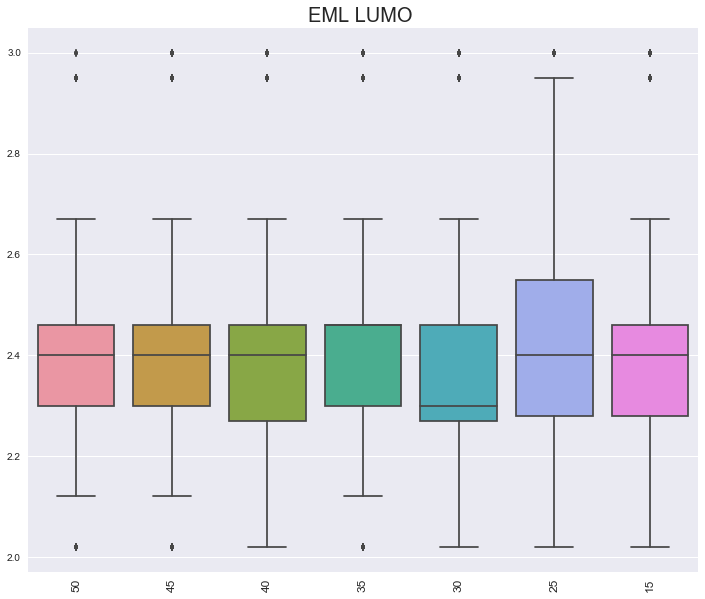

In [50]:
EML = {'50': df7['LUMO_EML'] , '45': df6['LUMO_EML'] , '40': df5['LUMO_EML'] , '35': df4['LUMO_EML'] , 
       '30': df3['LUMO_EML'] , '25': df2['LUMO_EML'] , '15': df1['LUMO_EML']}
sequence = ['50', '45', '40', '35', '30', '25', '15']
df = pd.DataFrame(data=EML).reindex(columns=sequence)

# boxplot
f, ax = plt.subplots(figsize=(12, 10))
fig = sns.boxplot(data=df)
plt.xticks(rotation=90,fontsize=12)
plt.title('EML LUMO ',fontsize=20);
df.describe()

,50,45,40,35,30,25,15
count,275.000000,2922.000000,8454.000000,2195.000000,14952.000000,3838.000000,6120.000000
mean,6.047455,5.807009,5.936805,5.798866,5.863733,6.143437,5.907647
std,0.611488,0.116734,0.468213,0.229038,0.329941,0.652602,0.417287
min,5.560000,5.560000,5.560000,5.560000,5.560000,5.560000,5.560000
25%,5.710000,5.710000,5.710000,5.700000,5.710000,5.800000,5.710000
50%,5.800000,5.800000,5.850000,5.800000,5.850000,5.900000,5.850000
75%,5.900000,5.900000,5.900000,5.860000,5.900000,5.920000,5.900000
max,7.500000,6.060000,7.500000,7.500000,7.500000,7.500000,7.500000


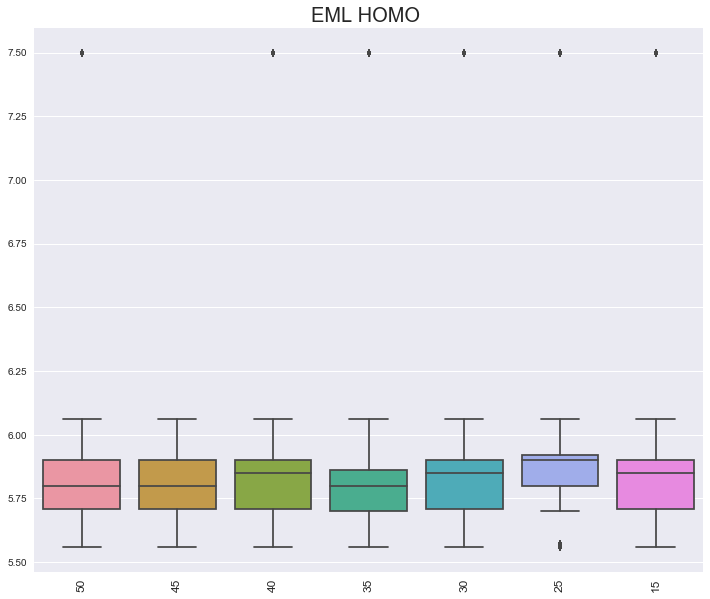

In [51]:
EML = {'50': df7['HOMO_EML'] , '45': df6['HOMO_EML'] , '40': df5['HOMO_EML'] , '35': df4['HOMO_EML'] , 
       '30': df3['HOMO_EML'] , '25': df2['HOMO_EML'] , '15': df1['HOMO_EML']}
sequence = ['50', '45', '40', '35', '30', '25', '15']
df = pd.DataFrame(data=EML).reindex(columns=sequence)

# boxplot
f, ax = plt.subplots(figsize=(12, 10))
fig = sns.boxplot(data=df)
plt.xticks(rotation=90,fontsize=12)
plt.title('EML HOMO ',fontsize=20);
df.describe()

,50,45,40,35,30,25,15
count,275.000000,2922.000000,8454.000000,2195.000000,14952.000000,3838.000000,6120.000000
mean,2.906218,2.945476,2.897038,2.954182,2.916110,2.852770,2.908824
std,0.143724,0.087751,0.110323,0.088091,0.101344,0.119157,0.107706
min,2.640000,2.790000,2.640000,2.640000,2.640000,2.640000,2.640000
25%,2.840000,2.900000,2.840000,2.930000,2.860000,2.800000,2.860000
50%,2.930000,2.940000,2.900000,2.940000,2.910000,2.900000,2.910000
75%,3.030000,2.940000,2.940000,2.940000,2.940000,2.930000,2.940000
max,3.100000,3.100000,3.100000,3.100000,3.100000,3.100000,3.100000


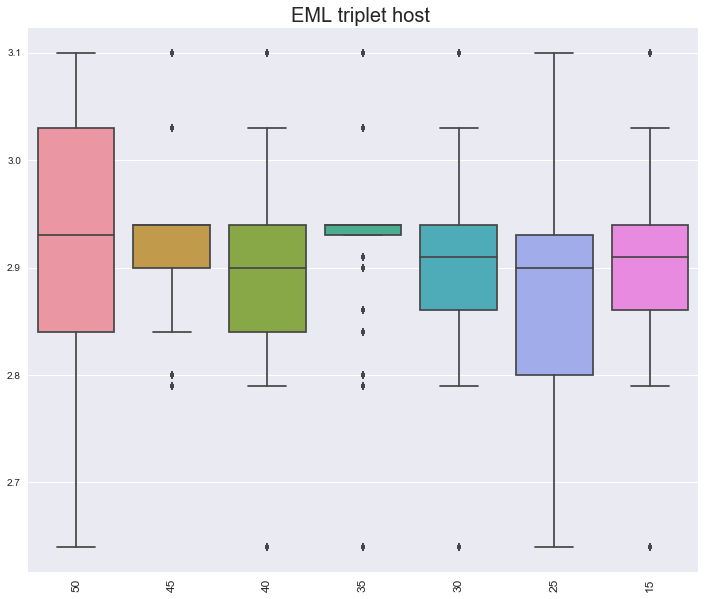

In [52]:
EML = {'50': df7['triplet_HOST'] , '45': df6['triplet_HOST'] , '40': df5['triplet_HOST'] , '35': df4['triplet_HOST'] , 
       '30': df3['triplet_HOST'] , '25': df2['triplet_HOST'] , '15': df1['triplet_HOST']}
sequence = ['50', '45', '40', '35', '30', '25', '15']
df = pd.DataFrame(data=EML).reindex(columns=sequence)

# boxplot
f, ax = plt.subplots(figsize=(12, 10))
fig = sns.boxplot(data=df)
plt.xticks(rotation=90,fontsize=12)
plt.title('EML triplet host ',fontsize=20);
df.describe()